In [26]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TEMP_CORONA.csv',sep=r'\s*,\s*',engine='python')

Text(0, 0.5, 'Russia')

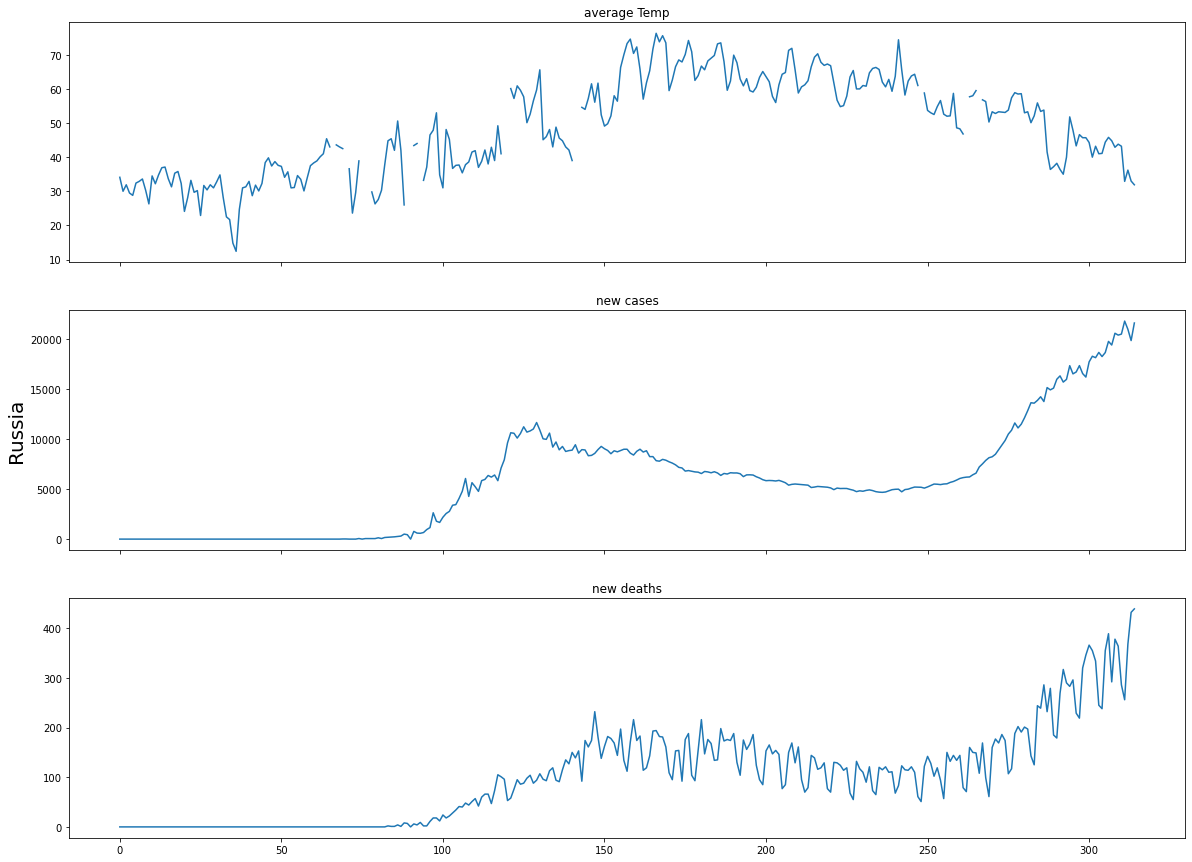

In [15]:
RU_df = df[df['Country_code']=='RU']
fig,ax = plt.subplots(3,figsize=(20,15),sharex=True)
plt.rc('axes',labelsize=2) 
ax[0].set_title('average Temp')
ax[0].plot(RU_df['Temperature (آ° F)(AVG)'])
#ax[0].set(ylabel='F')
ax[1].set_title('new cases')
ax[1].plot(RU_df['New_cases'])
ax[2].set_title('new deaths')
ax[2].plot(RU_df['New_deaths'])
ax[1].set_ylabel('Russia',fontsize = 20)


In [22]:
def normalize(df):
    feature_list=['Temperature (آ° F)(AVG)','New_cases','New_deaths']
    result = df.copy()
    for feature_name in feature_list:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

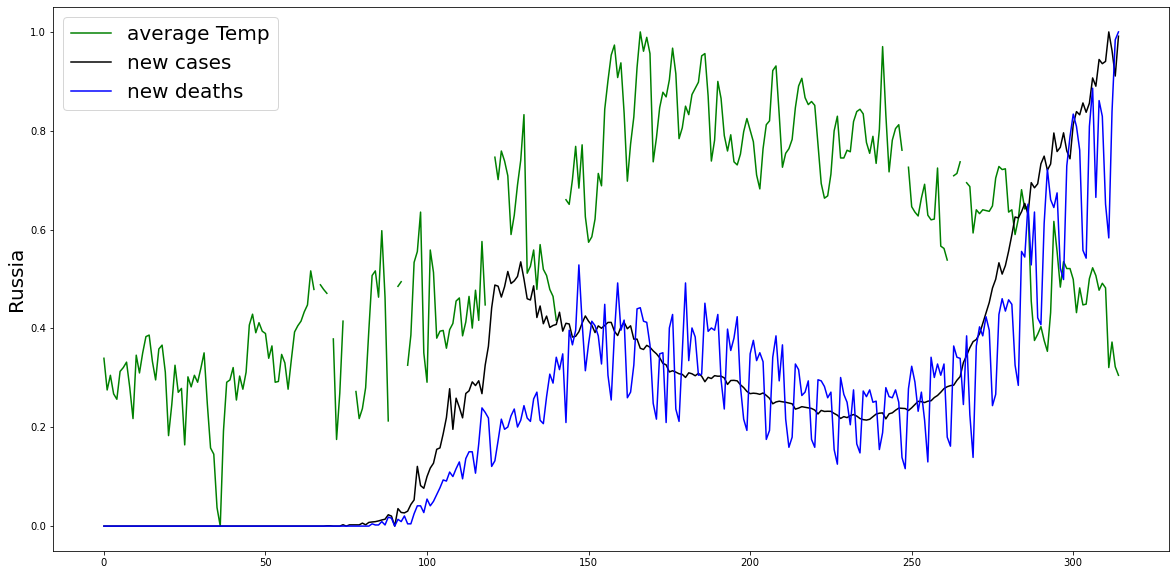

In [23]:
RU_df = df[df['Country_code']=='RU']
RU_df=normalize(RU_df)

fig,ax = plt.subplots(1,figsize=(20,10),sharex=True)
ax.plot(RU_df['Temperature (آ° F)(AVG)'],label='average Temp',color='g')
ax.plot(RU_df['New_cases'],label = 'new cases',color='k')
ax.plot(RU_df['New_deaths'],label ='new deaths',color='b')
ax.set_ylabel('Russia',fontsize = 20)
legend = ax.legend(loc='best',fontsize = 20)

In [41]:
def save_plot_in_One(Ccode):
    c_df=df[df['Country_code']==Ccode]
    c_df=normalize(c_df)
    fig,ax = plt.subplots(1,figsize=(20,10),sharex=True)
    ax.plot(c_df['Temperature (آ° F)(AVG)'],label='average Temp',color='g')
    ax.plot(c_df['New_cases'],label = 'new cases',color='k')
    ax.plot(c_df['New_deaths'],label ='new deaths',color='b')
    ax.set_ylabel(Ccode,fontsize = 20)
    legend = ax.legend(loc='best',fontsize = 20)
    fig.savefig(f'{Ccode}(uni).png')

    
Ccode_list= df.Country_code.unique()
for Ccode in Ccode_list:
    save_plot_in_One(Ccode)
    

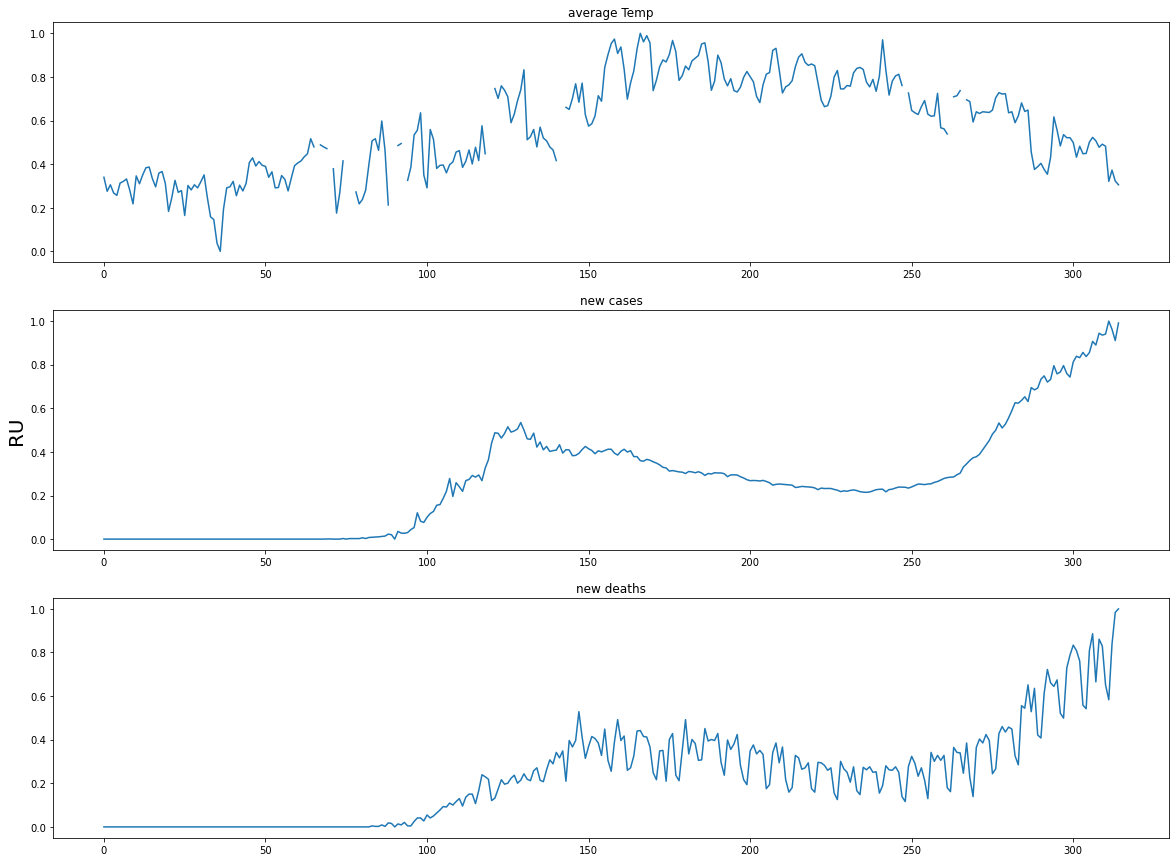

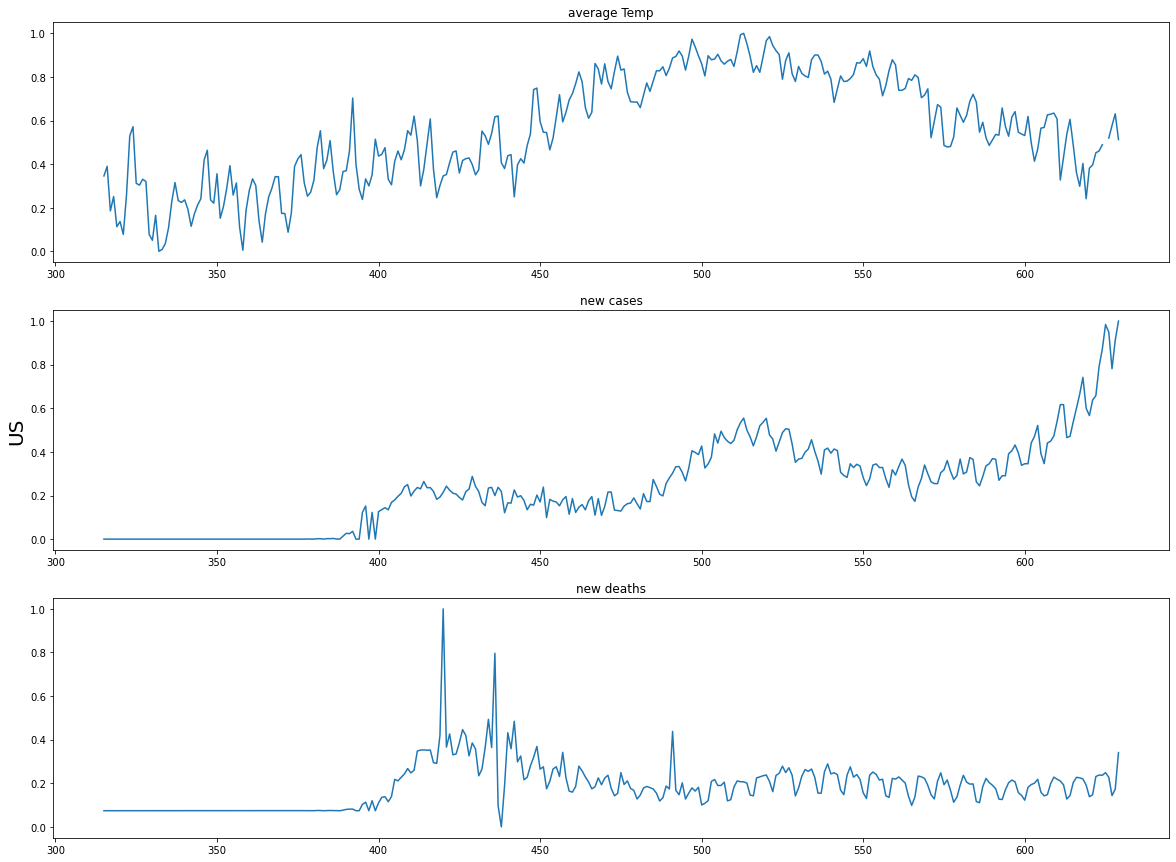

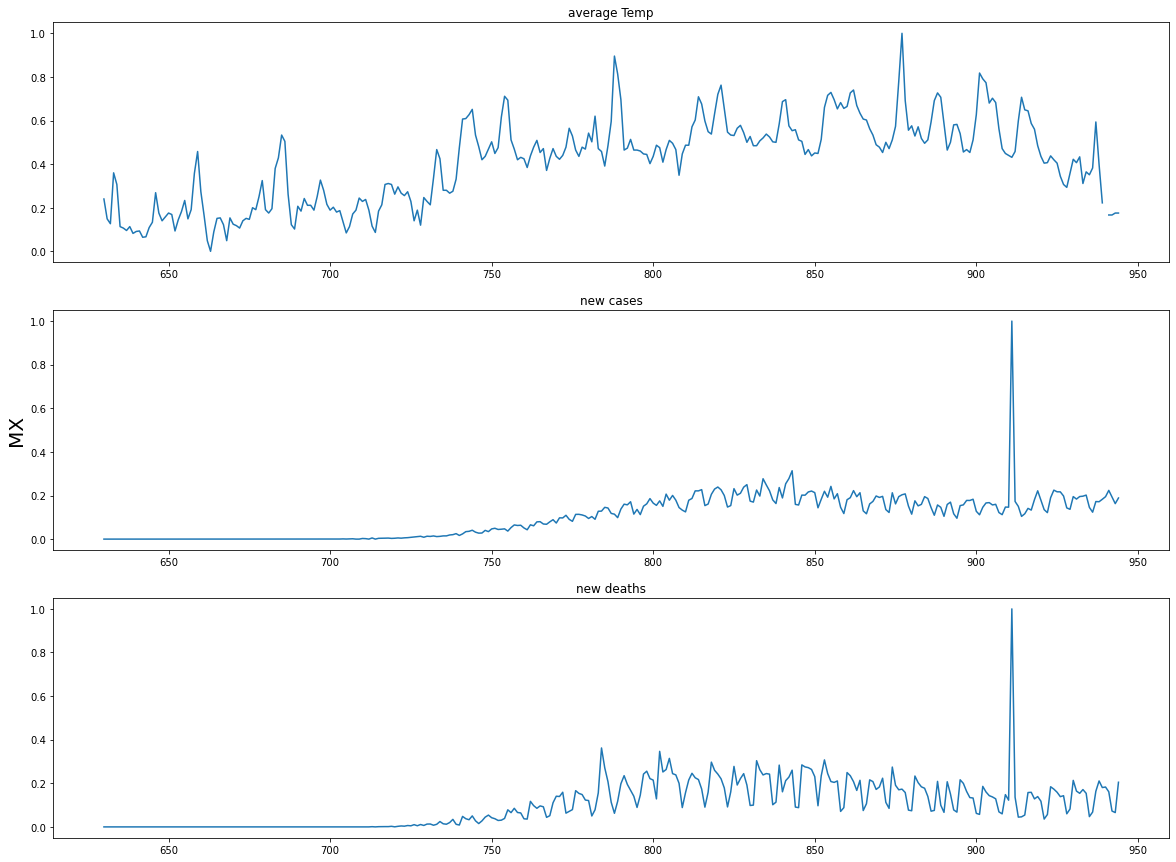

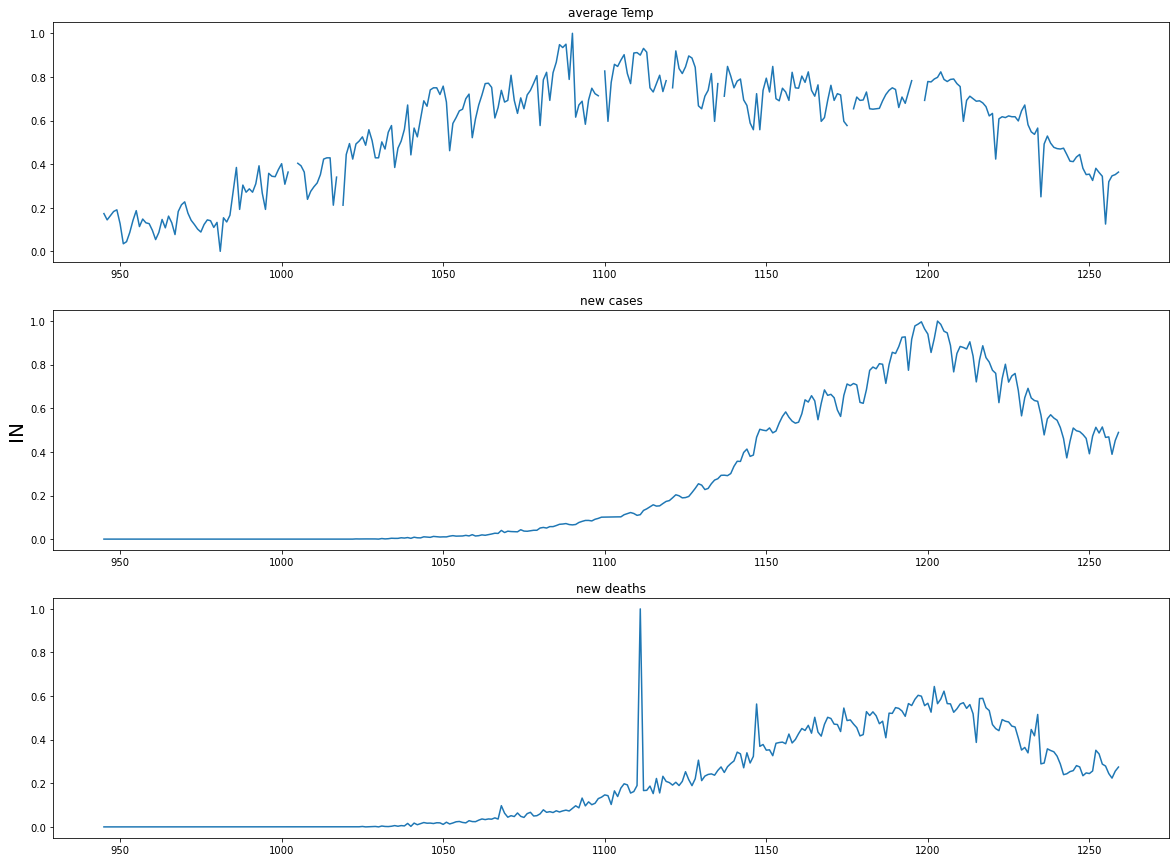

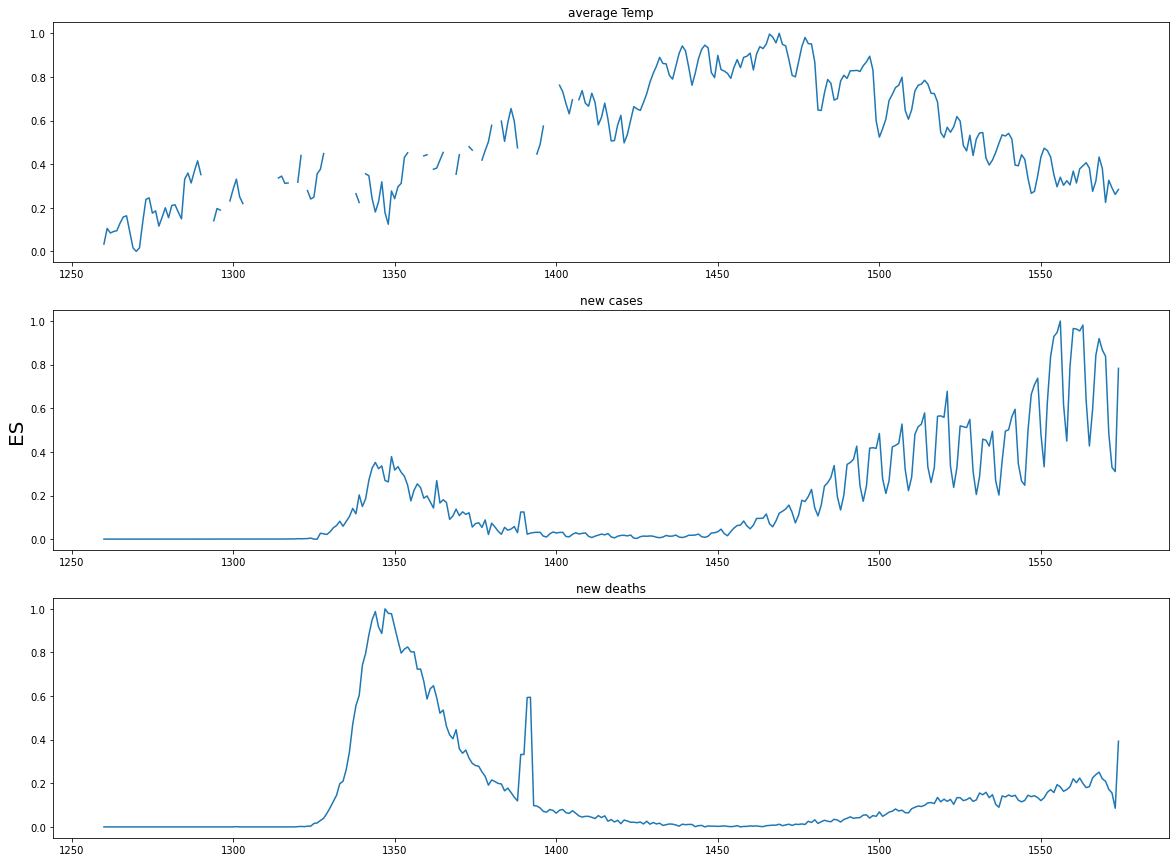

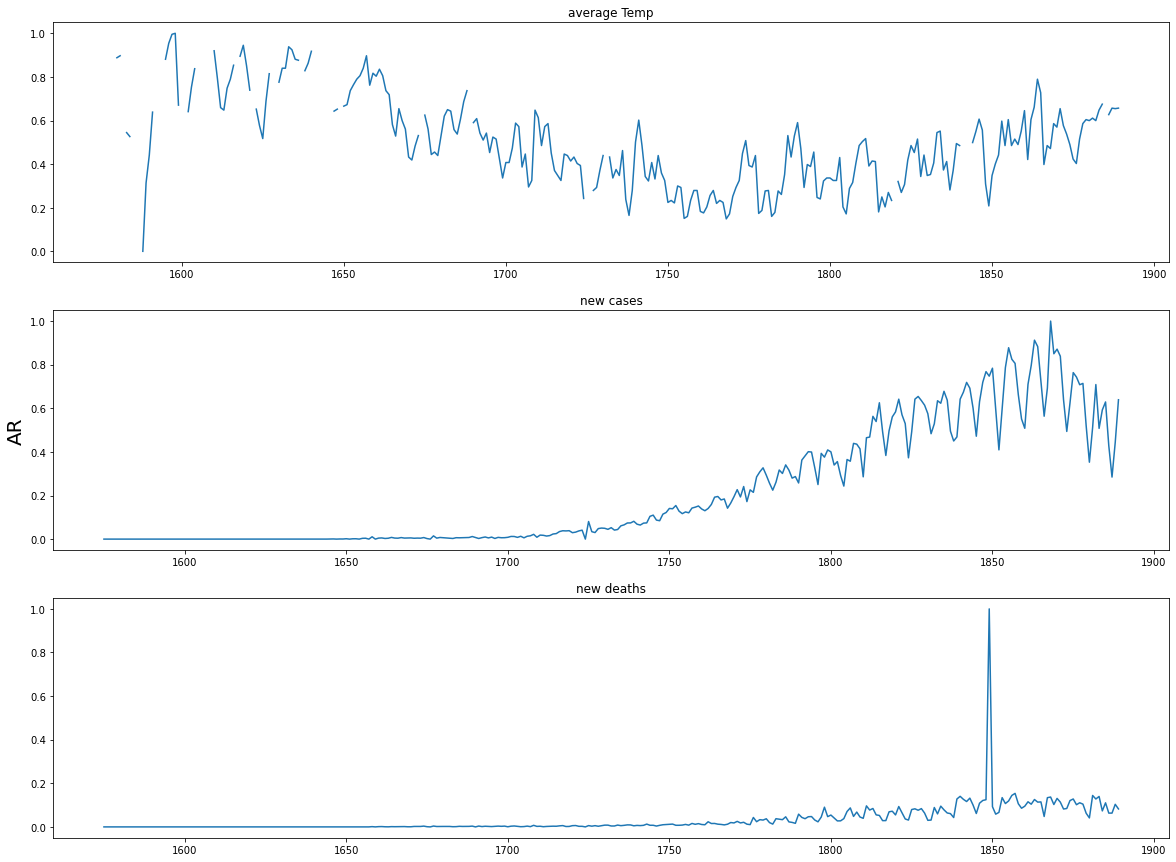

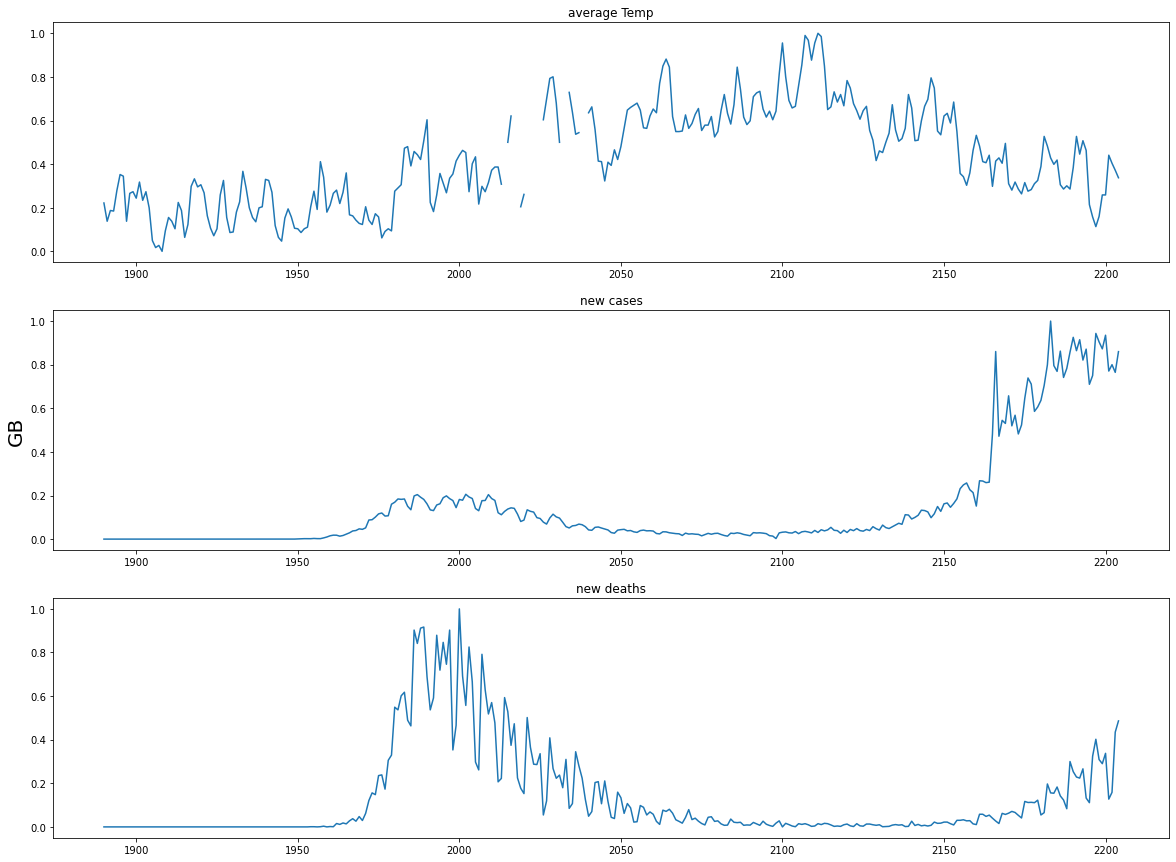

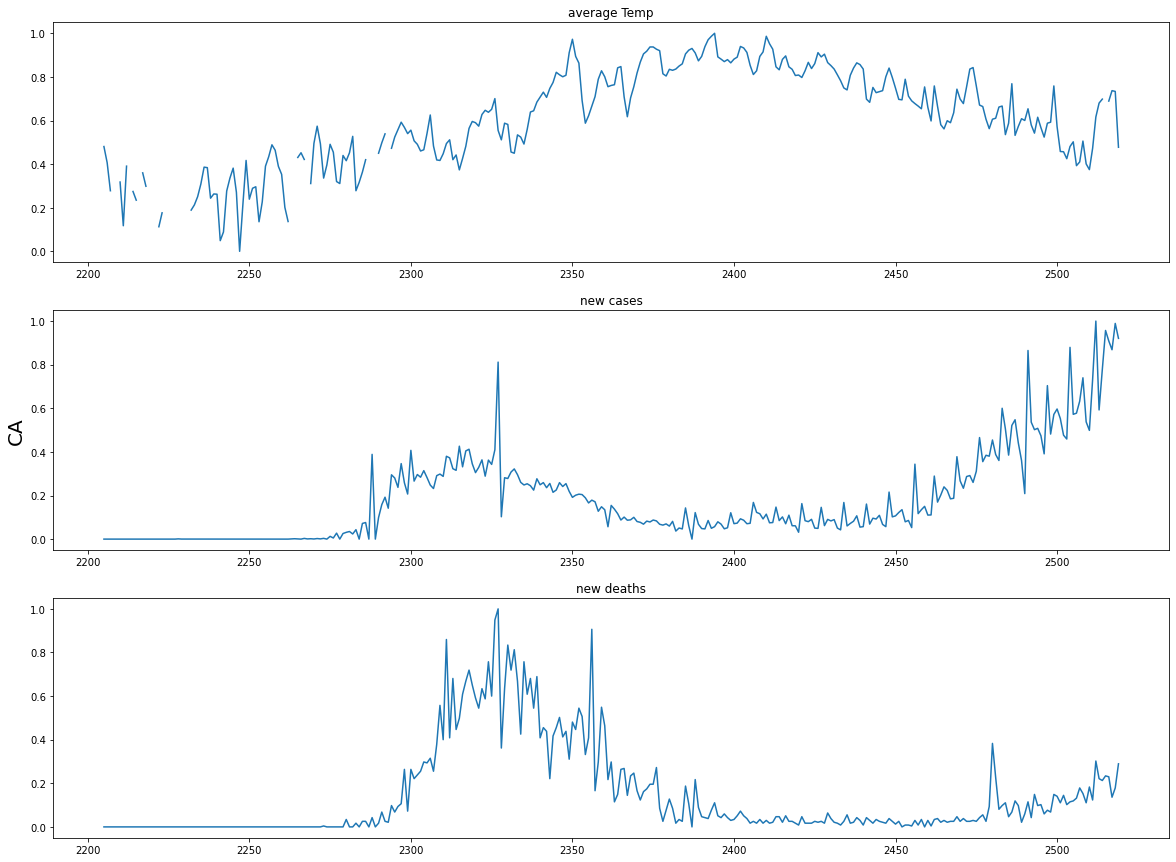

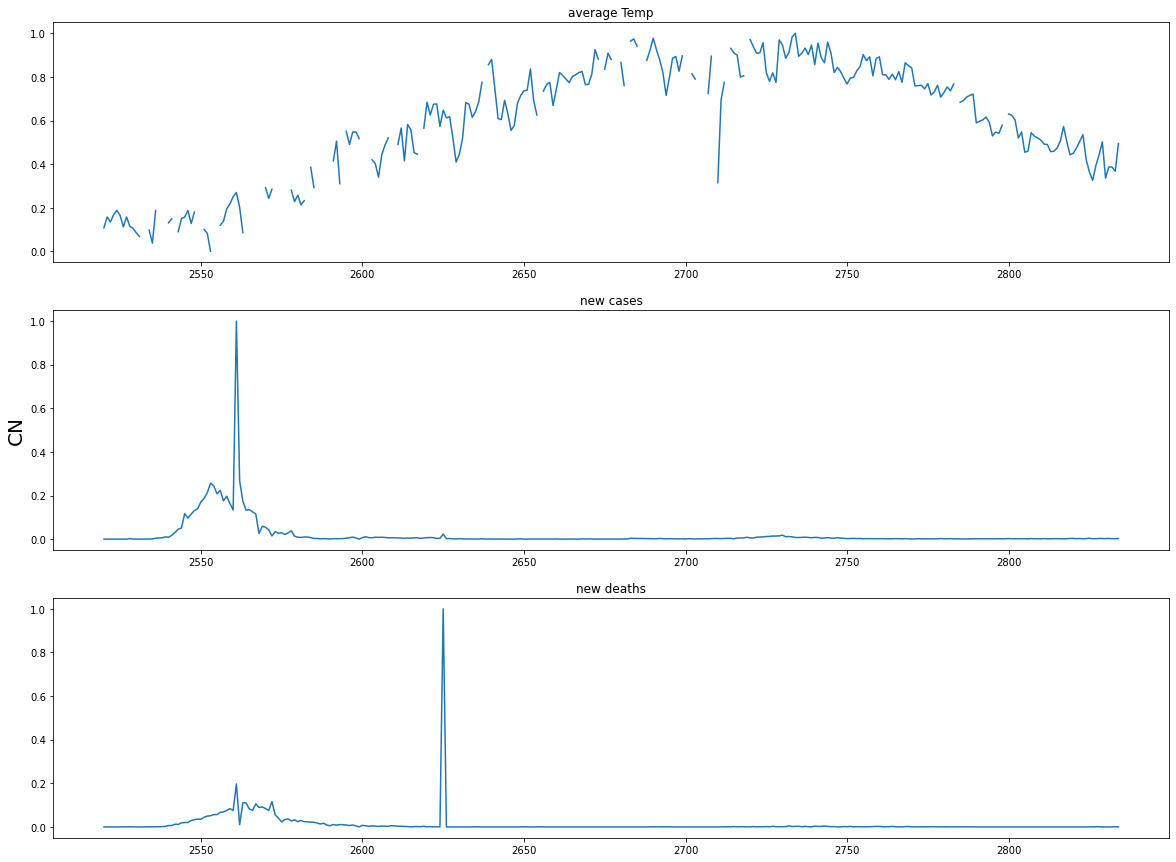

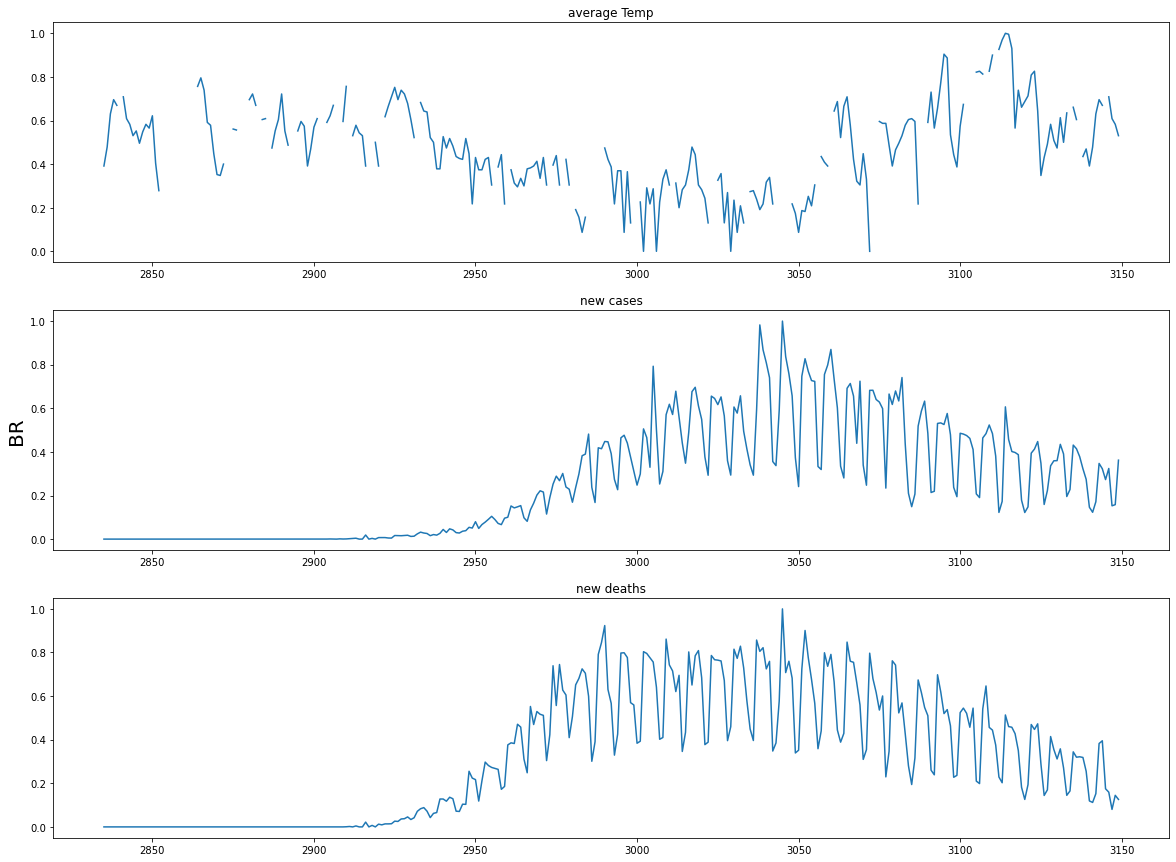

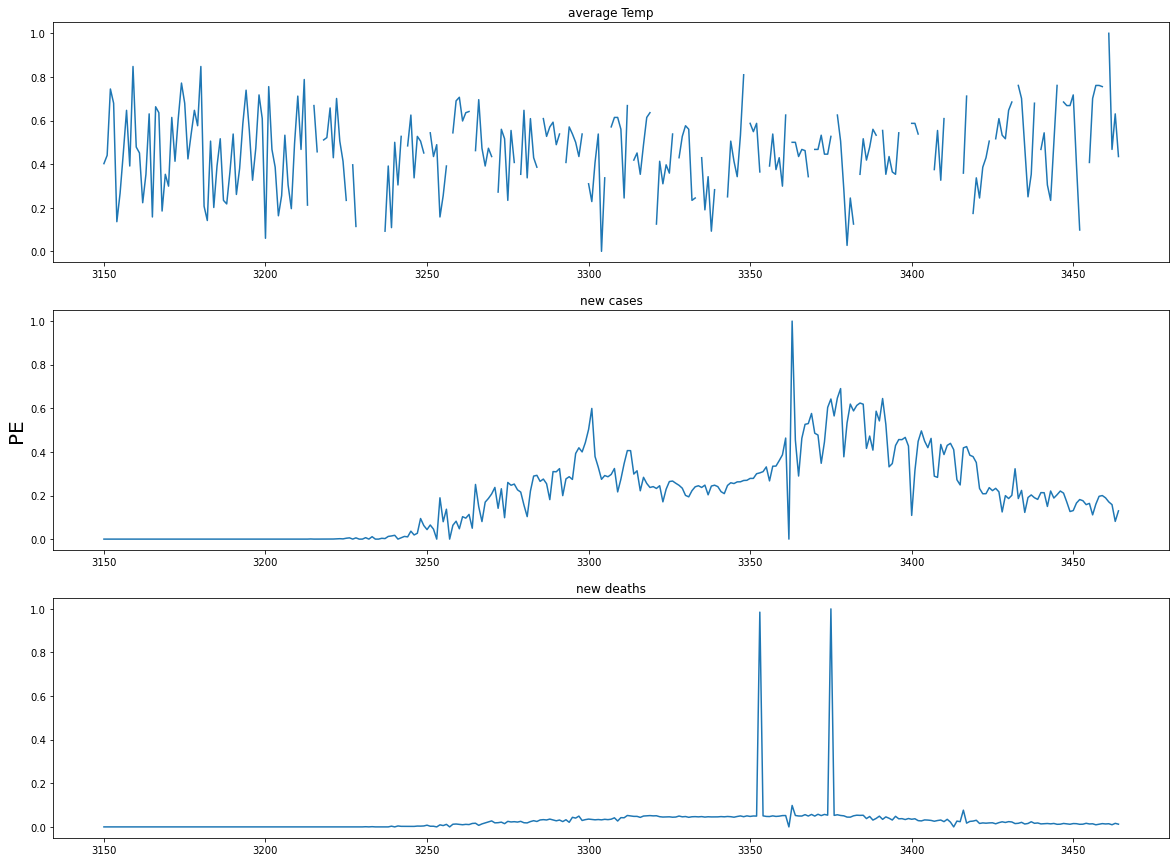

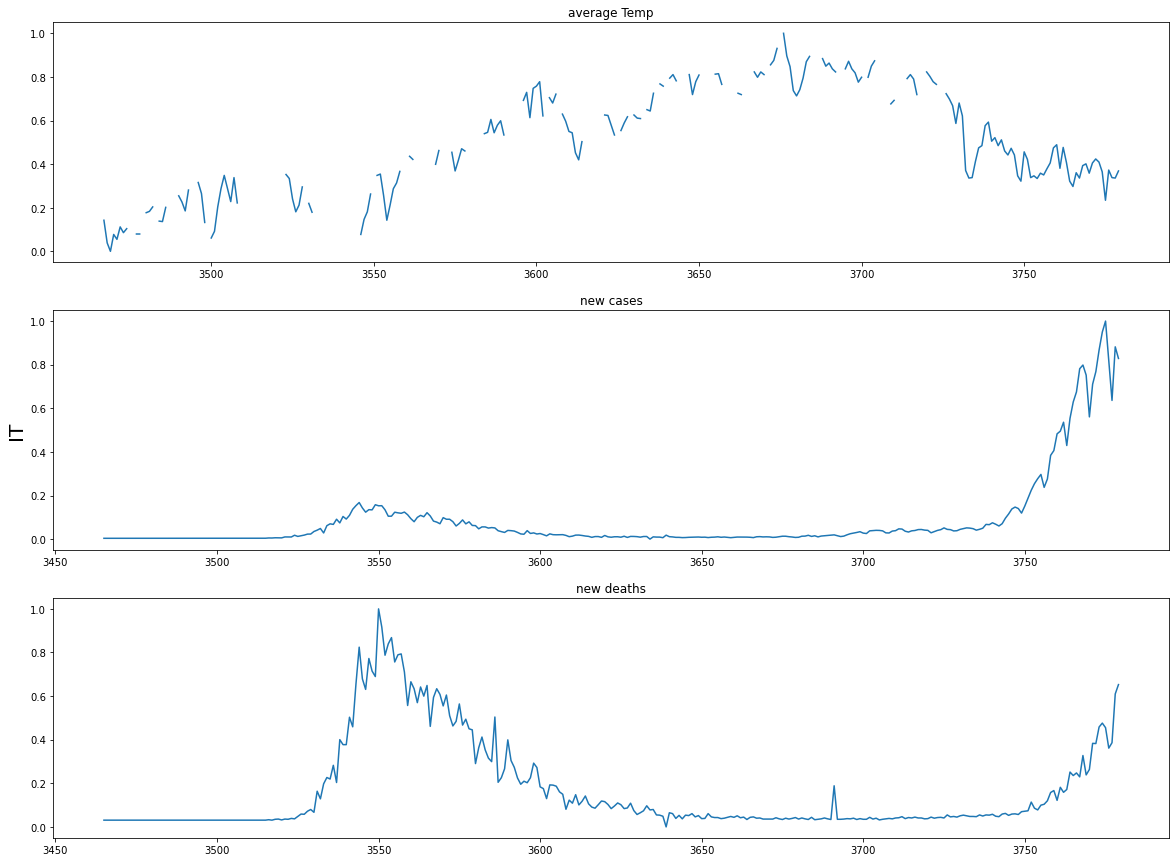

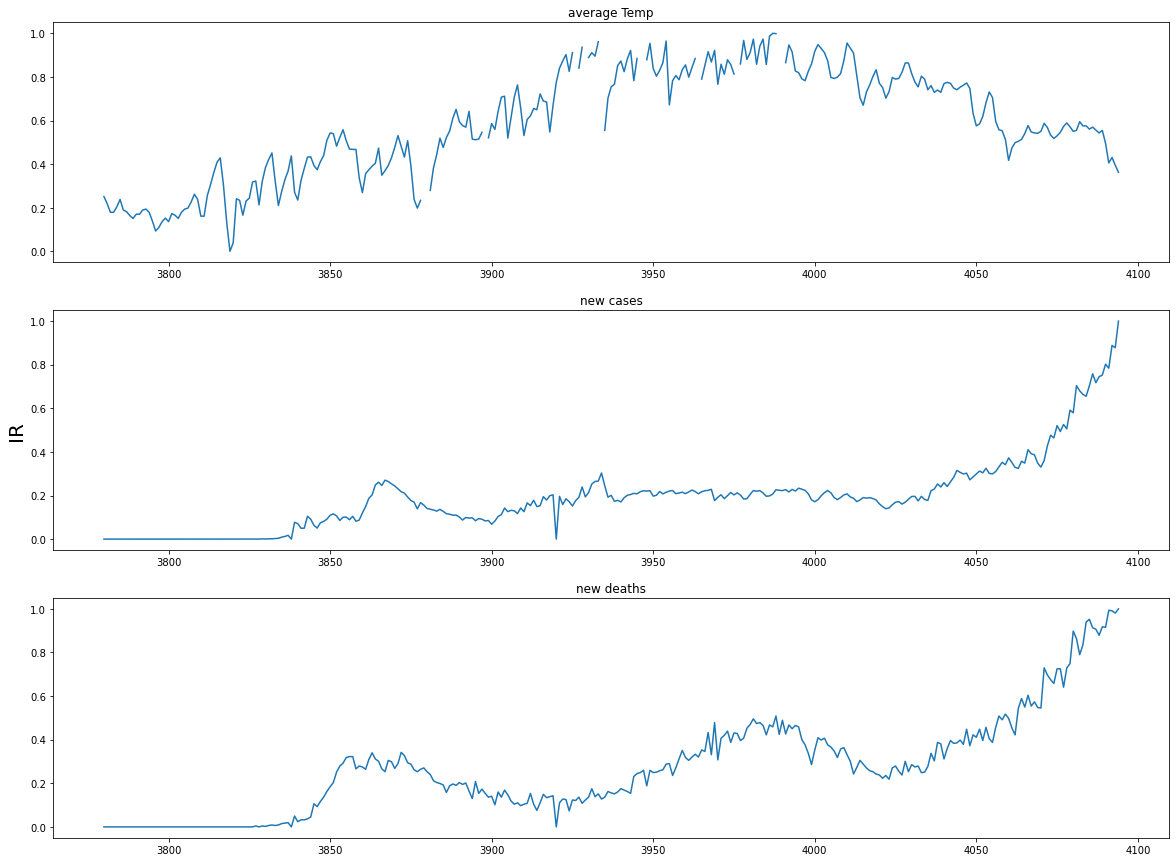

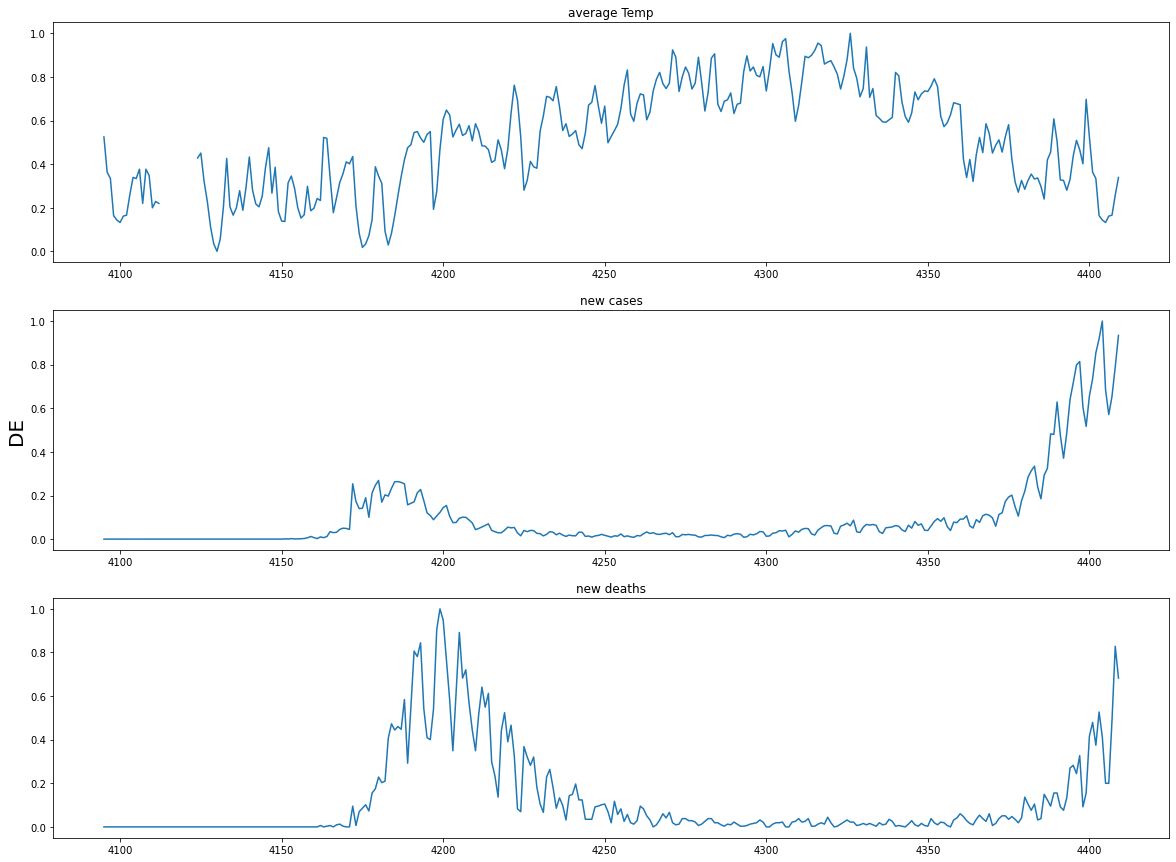

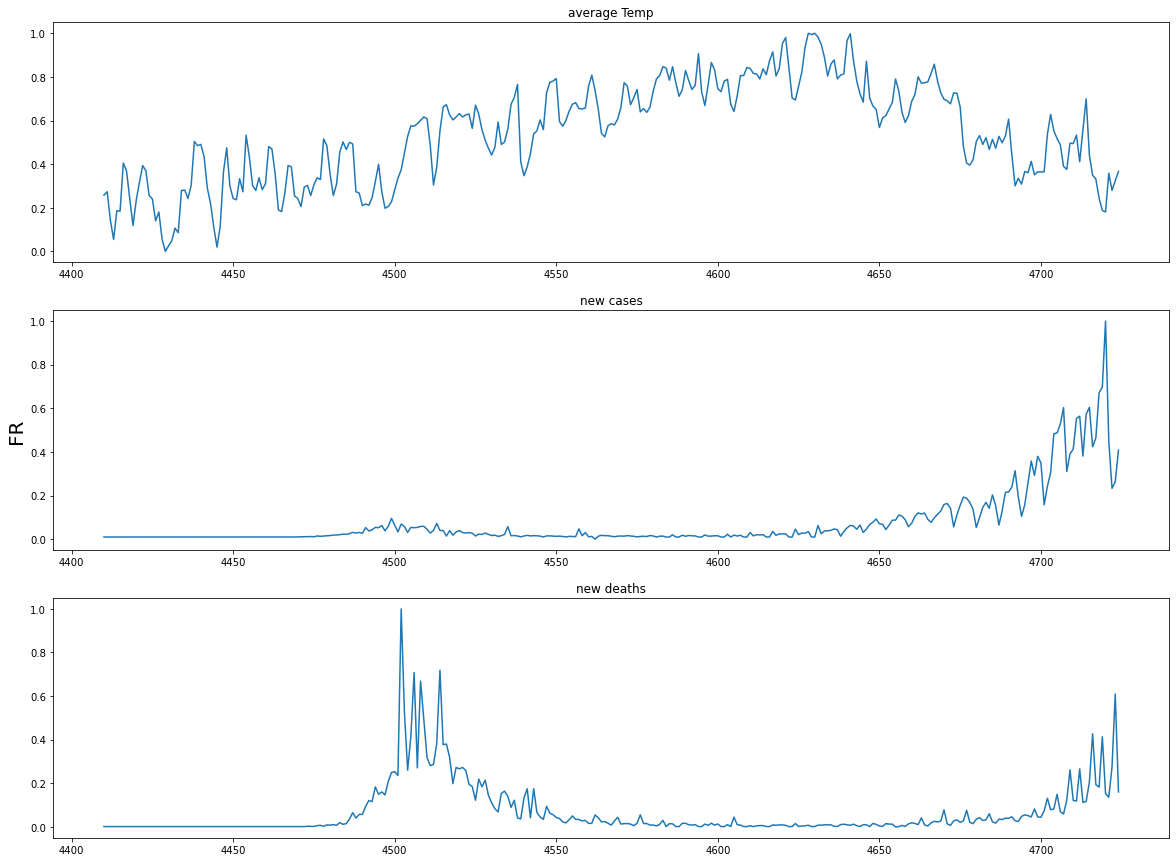

In [48]:
def save_plot_in_multi(Ccode):
    c_df=df[df['Country_code']==Ccode]
    c_df=normalize(c_df)
    fig,ax = plt.subplots(3,figsize=(20,15))
    plt.rc('axes',labelsize=2) 
    ax[0].set_title('average Temp')
    ax[0].plot(c_df['Temperature (آ° F)(AVG)'])
    #ax[0].set(ylabel='F')
    ax[1].set_title('new cases')
    ax[1].plot(c_df['New_cases'])
    ax[2].set_title('new deaths')
    ax[2].plot(c_df['New_deaths'])
    ax[1].set_ylabel(Ccode,fontsize = 20)
    fig.savefig(f'{Ccode}(multi).png')

for Ccode in Ccode_list:
    save_plot_in_multi(Ccode)
    